In [11]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Configure TensorFlow to use multiple threads
tf.config.threading.set_intra_op_parallelism_threads(8)
tf.config.threading.set_inter_op_parallelism_threads(8)

In [13]:
# Path to the dataset on the local machine
dataset_path = r"C:\Users\Shamiur Rahman\Desktop\Bird Species Dataset"

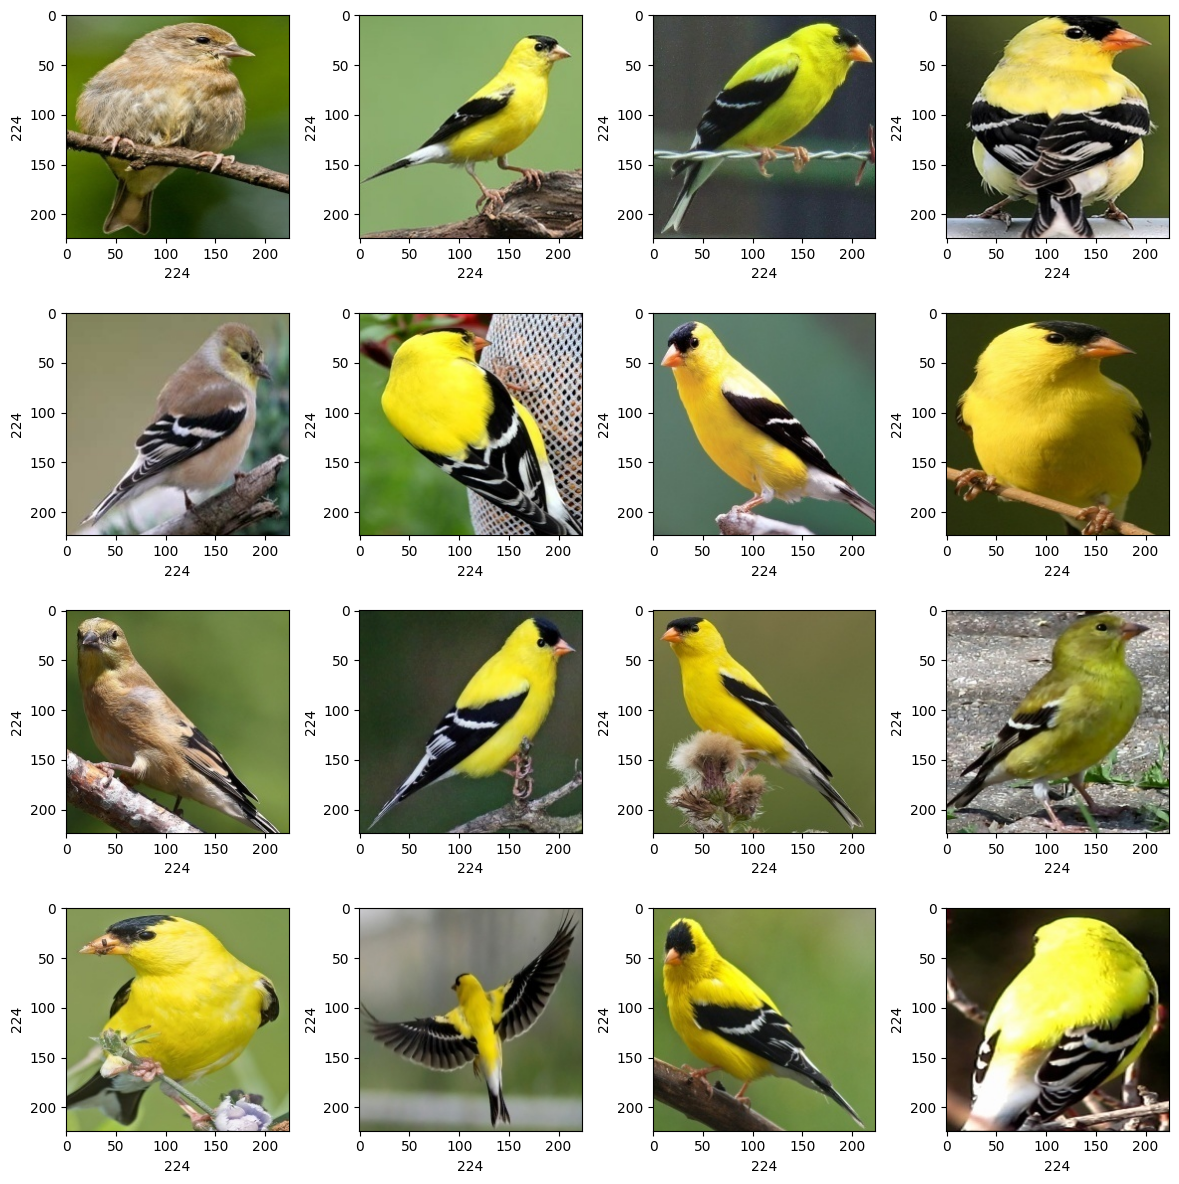

In [15]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = r"C:\Users\Shamiur Rahman\Desktop\Bird Species Dataset\AMERICAN GOLDFINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [17]:
# creating empty list
root_dir = listdir(dataset_path)
image_list, label_list = [], []

In [21]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dataset_path}/{directory}"):
    image_path = f"{dataset_path}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [23]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

0                 
AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
Name: count, dtype: int64

In [25]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

6

In [27]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [29]:
# Checking labels shape 
label_list = np.array(label_list)
label_list.shape

(811,)

In [31]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [33]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

In [35]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [ ]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Next, a network architecture for the model will be created. Various types of layers will be used according to their features:

- **Conv2D:** A convolutional kernel will be created and convolved with the input layer to produce the output tensor.
- **MaxPooling2D:** A downsampling technique will be applied that takes the maximum value over the window defined by `pool_size`.
- **Flatten:** The input will be flattened to create a 1D output.
- **Dense:** The output will be produced as the dot product of the input and kernel.

In the final layer, **softmax** will be used as the activation function due to the multi-class classification problem.

In [39]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

C:\AnnaConda\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,038 (1.29 MB)

 Trainable params: 338,038 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Compiling model, setting the metrics and the optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [45]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step - accuracy: 0.2150 - loss: 1.7933 - val_accuracy: 0.4462 - val_loss: 1.6703
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.3957 - loss: 1.6710 - val_accuracy: 0.5462 - val_loss: 1.5491
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.5415 - loss: 1.5180 - val_accuracy: 0.4923 - val_loss: 1.4099
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.4994 - loss: 1.4094 - val_accuracy: 0.6308 - val_loss: 1.2506
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.5707 - loss: 1.2537 - val_accuracy: 0.6231 - val_loss: 1.1684
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.6403 - loss: 1.1165 - val_accuracy: 0.6846 - val_loss: 1.1022
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.6896 - loss: 1.0246 - val_accuracy: 0.6385 - val_loss: 0.9806
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.6997 - loss: 0.9121 - val_accuracy: 0.7769 - val_loss:

In [51]:
# Saving model
model.save(r"C:\Users\Shamiur Rahman\Desktop\Bird Species Dataset\bird_species.keras")

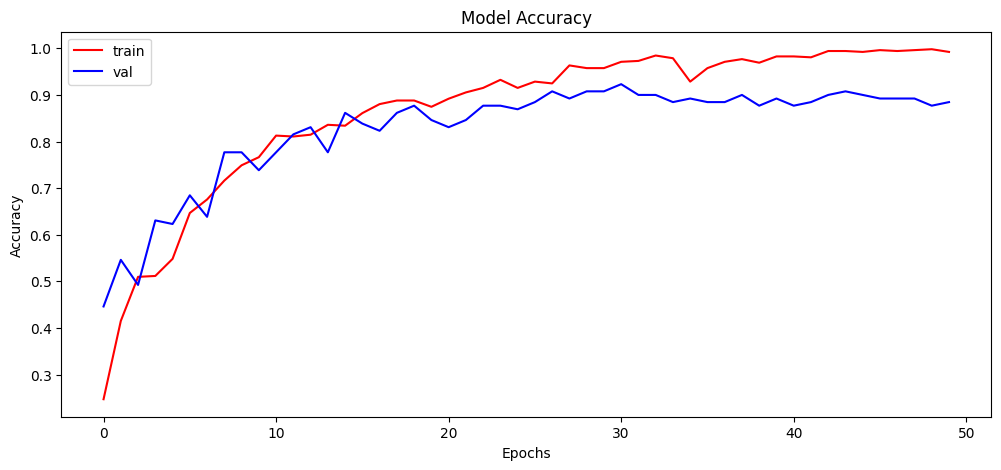

In [53]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

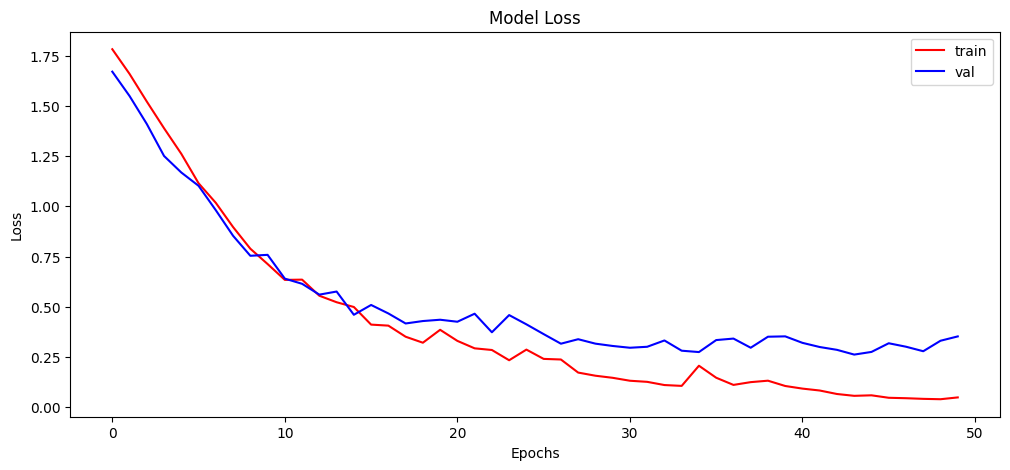

In [55]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [57]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8050 - loss: 0.4520
Test Accuracy: 82.82208442687988


In [67]:
# Storing predictions
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


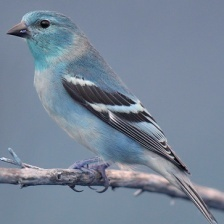

In [69]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

In [71]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  AMERICAN GOLDFINCH
Predicted :  AMERICAN GOLDFINCH


In [75]:
from sklearn.metrics import f1_score, classification_report

# After storing predictions
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculating F1 Score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")


#printing a detailed classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=lb.classes_)
print(report)

F1 Score: 0.8299687714590513
                    precision    recall  f1-score   support

AMERICAN GOLDFINCH       1.00      0.83      0.91        24
          BARN OWL       0.65      0.97      0.78        31
 CARMINE BEE-EATER       0.89      0.89      0.89        27
  DOWNY WOODPECKER       0.92      0.88      0.90        26
   EMPEROR PENGUIN       0.96      0.77      0.85        30
          FLAMINGO       0.71      0.60      0.65        25

          accuracy                           0.83       163
         macro avg       0.86      0.82      0.83       163
      weighted avg       0.85      0.83      0.83       163



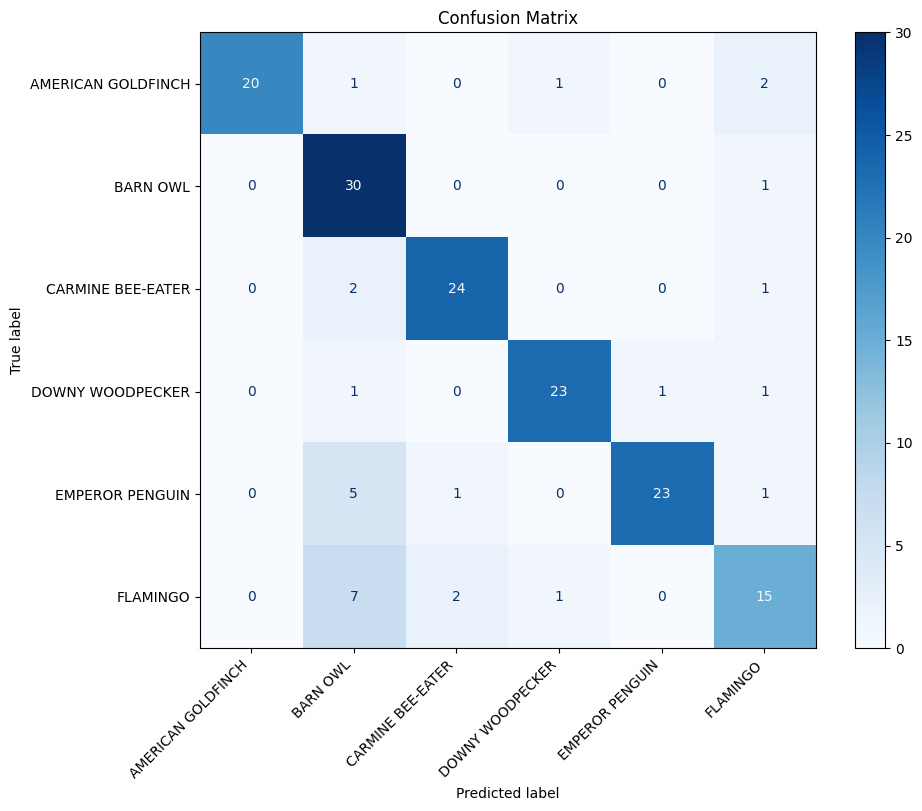

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lb.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)

# Adjust tick label rotation
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Confusion Matrix')
plt.show()


**Conclusion:**

After The dataset was loaded and the images were visualized, normalization was performed as an important step when working with the dataset. A CNN model was then created, which was used for predicting the bird species based on the image supplied to the model.

**Scope:**

This project can be used for educational purposes to gain a better understanding of creating network architectures for CNN models. The model can be further hyperparameter-tuned to achieve higher accuracy. It can also be utilized by bird sanctuaries to identify different types of birds.